# Laboratorio 5 - Análisis de Sentimientos

### Josué Sagastume
### Carné 18173

In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk
import os
import re
import unicodedata
import string

from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=314)

In [5]:
count_ones = (df_train['target'] == 1).sum()
count_zeros = (df_train['target'] == 0).sum()
print("Si hablan de un desastre real: ", count_ones)
print("No hablan de un desastre real: ", count_zeros)

Si hablan de un desastre real:  2593
No hablan de un desastre real:  3497


In [6]:
print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))

Training Set Shape = (6090, 5)
Training Set Memory Usage = 0.28 MB


In [7]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())

Train Length Stat
count    6090.000000
mean      101.067488
std        33.909469
min         7.000000
25%        77.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64


In [8]:
# Convertir texto a minusculas
df_train["text"] = df_train["text"].apply(lambda x: x.lower())
df_train.head()

,id,keyword,location,text,target,length
1745,2512,collision,"Ontario, Canada",collision: #hwy401 eb just east of hwy 8 #camb...,1,108
3815,5420,first%20responders,"Portage, IN / Worldwide",û÷we can helpûª says denver firefighter work...,1,104
7273,10412,whirlwind,#KaumElite;#F?VOR;#SMOFC,@byuwnbeki the sad eyes and tacit stories in y...,1,100
5444,7765,police,"Portland, OR",unwanted person at 200 block of se 12th ave po...,0,102
4015,5704,floods,NaN,typhoon soudelor approaches after 7 killed 2 m...,1,112


In [9]:
# Se eliminan caracteres especiales
import string
punc_ext = string.punctuation + '¡¿'
def remove_punctuation(text):
    return text.translate(text.maketrans('', '', punc_ext))

In [10]:
df_train['text'] = df_train['text'].apply(lambda line: remove_punctuation(line))

In [11]:
df_train.head()

,id,keyword,location,text,target,length
1745,2512,collision,"Ontario, Canada",collision hwy401 eb just east of hwy 8 cambrid...,1,108
3815,5420,first%20responders,"Portage, IN / Worldwide",û÷we can helpûª says denver firefighter work...,1,104
7273,10412,whirlwind,#KaumElite;#F?VOR;#SMOFC,byuwnbeki the sad eyes and tacit stories in yo...,1,100
5444,7765,police,"Portland, OR",unwanted person at 200 block of se 12th ave po...,0,102
4015,5704,floods,NaN,typhoon soudelor approaches after 7 killed 2 m...,1,112


In [12]:
# Se eliminan URL's en caso de haber
def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

In [13]:
df_train['text'] = df_train['text'].apply(lambda line: remove_url(line))

In [14]:
r1 = df_train.loc[df_train['target']==1, ['text']]
r2 = df_train.loc[df_train['target']==0, ['text']]

In [15]:
stopwords = set(STOPWORDS)

def most_used_words(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

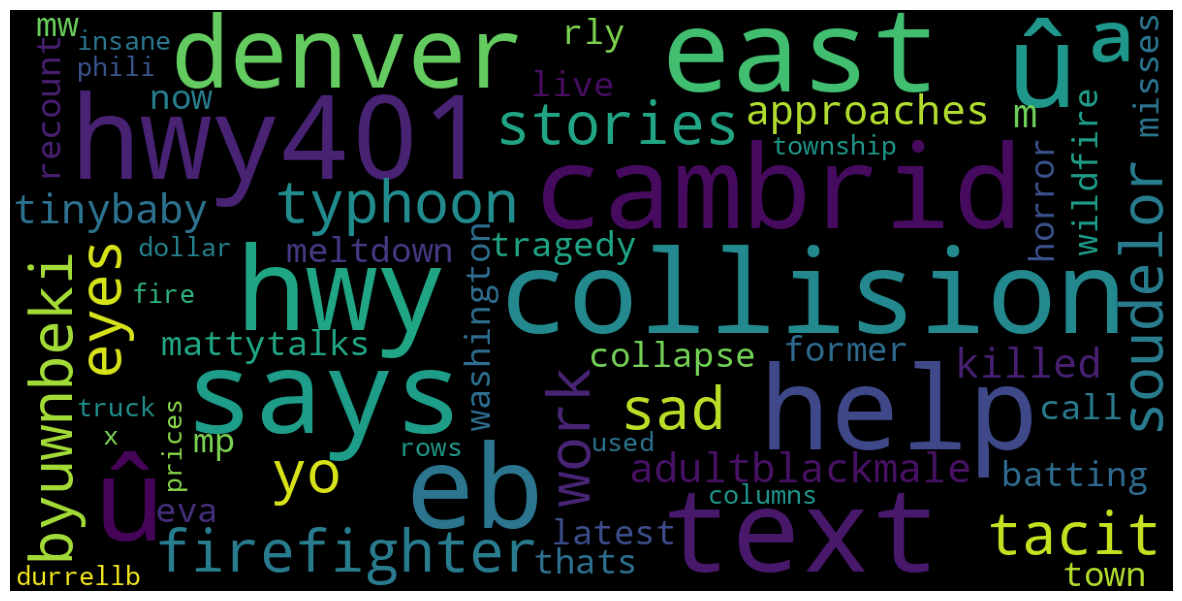

In [16]:
most_used_words(r1)

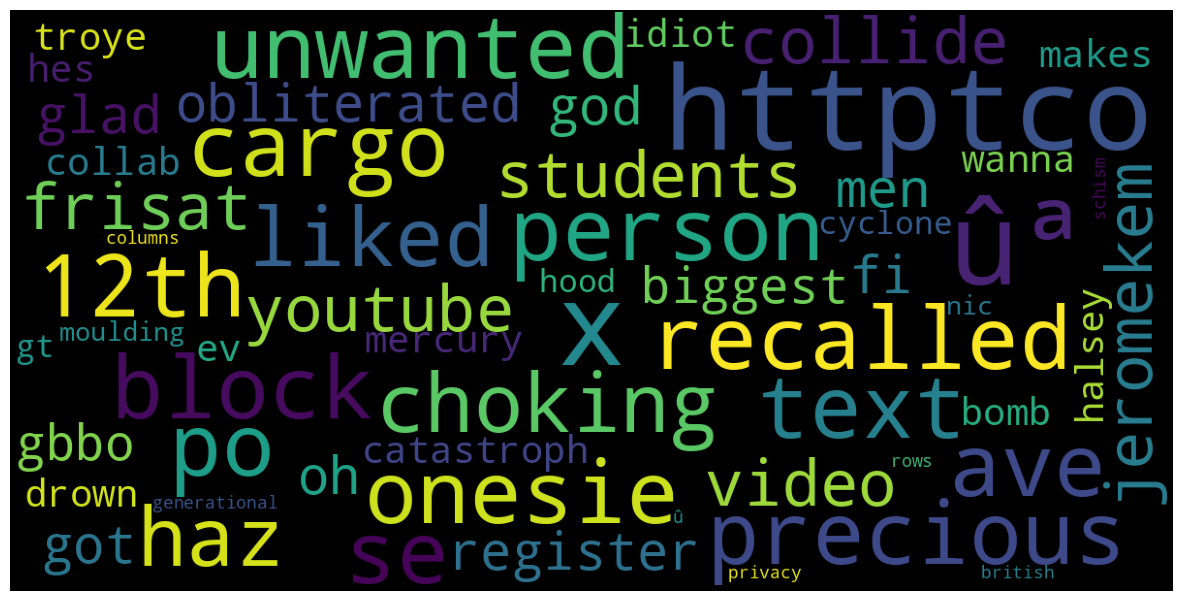

In [17]:
most_used_words(r2)

In [18]:
df_train.head()

,id,keyword,location,text,target,length
1745,2512,collision,"Ontario, Canada",collision hwy401 eb just east of hwy 8 cambrid...,1,108
3815,5420,first%20responders,"Portage, IN / Worldwide",û÷we can helpûª says denver firefighter work...,1,104
7273,10412,whirlwind,#KaumElite;#F?VOR;#SMOFC,byuwnbeki the sad eyes and tacit stories in yo...,1,100
5444,7765,police,"Portland, OR",unwanted person at 200 block of se 12th ave po...,0,102
4015,5704,floods,NaN,typhoon soudelor approaches after 7 killed 2 m...,1,112


In [19]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [20]:
tokenizer = RegexpTokenizer(r'\w+')

In [21]:
df_train['text'] = df_train['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [22]:
df_train.head(20)

,id,keyword,location,text,target,length
1745,2512,collision,"Ontario, Canada","[collision, hwy401, eb, just, east, of, hwy, 8...",1,108
3815,5420,first%20responders,"Portage, IN / Worldwide","[û, we, can, help, ûª, says, denver, firefight...",1,104
7273,10412,whirlwind,#KaumElite;#F?VOR;#SMOFC,"[byuwnbeki, the, sad, eyes, and, tacit, storie...",1,100
5444,7765,police,"Portland, OR","[unwanted, person, at, 200, block, of, se, 12t...",0,102
4015,5704,floods,NaN,"[typhoon, soudelor, approaches, after, 7, kill...",1,112
4948,7052,meltdown,Hustletown,"[tinybaby, adultblackmale, mattytalks, meltdow...",1,57
4204,5972,hazard,Massachusetts,"[precious, cargo, onesie, recalled, for, choki...",0,73
1257,1813,buildings%20on%20fire,NaN,"[i, hope, the, only, time, i, end, up, on, tv,...",1,94
1432,2067,casualty,south of heaven,"[cos, sanity, brings, no, reward, for, one, mo...",1,102
514,740,attacked,"SÌ£o Paulo SP, Brasil","[christian, attacked, by, muslims, at, the, te...",1,122


In [23]:
import nltk
nltk.download()
# descargar all-corpora

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all-corpora


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Downloading package cess_esp to /root/nltk_data...
       |   Package cess_esp is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
     


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [24]:
from nltk.corpus import stopwords
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

In [25]:
df_train['text'] = df_train['text'].apply(lambda x: remove_stopwords(x))

In [26]:
df_train['text'].head()

1745    [collision, hwy401, eb, east, hwy, 8, cambridg...
3815    [û, help, ûª, says, denver, firefighter, worki...
7273    [byuwnbeki, sad, eyes, tacit, stories, heart, ...
5444    [unwanted, person, 200, block, se, 12th, ave, ...
4015    [typhoon, soudelor, approaches, 7, killed, 2, ...
Name: text, dtype: object

In [27]:
dfText = df_train['text'].apply(pd.Series).stack().value_counts()

In [28]:
print(dfText)

û                    366
like                 282
amp                  239
im                   232
fire                 201
                    ... 
saddledome             1
httptco5g8qa6mpxm      1
kai                    1
forbath                1
httptcodmsnyptscy      1
Length: 19103, dtype: int64


<Axes: >

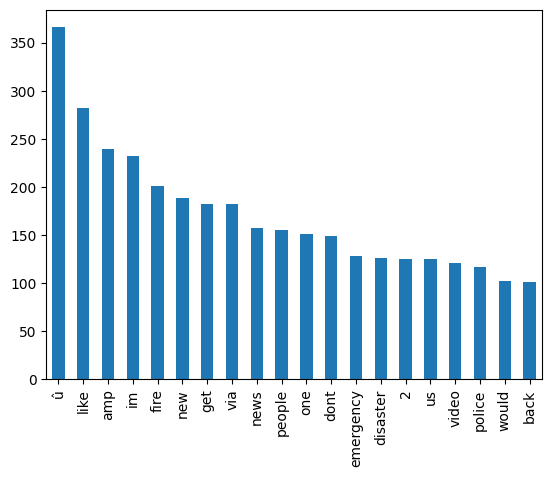

In [29]:
dfText[:20].plot.bar()

## Modelo

In [30]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df_train['text'])

In [31]:
train_sequences = tokenizer.texts_to_sequences(df_train['text'])
test_sequences = tokenizer.texts_to_sequences(df_test['text'])

In [32]:
max_sequence_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),  # Conv1D para capturar n-gramas
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(train_padded, df_train['target'], epochs=10, batch_size=32, validation_data=(test_padded, df_test['target']))

Epoch 1/10
191/191 [==============================] - 6s 28ms/step - loss: 0.5682 - accuracy: 0.7113 - val_loss: 0.4666 - val_accuracy: 0.7925
Epoch 2/10
191/191 [==============================] - 6s 31ms/step - loss: 0.3309 - accuracy: 0.8609 - val_loss: 0.4619 - val_accuracy: 0.7932
Epoch 3/10
191/191 [==============================] - 5s 27ms/step - loss: 0.1843 - accuracy: 0.9335 - val_loss: 0.5433 - val_accuracy: 0.7853
Epoch 4/10
191/191 [==============================] - 7s 35ms/step - loss: 0.1080 - accuracy: 0.9624 - val_loss: 0.6241 - val_accuracy: 0.7800
Epoch 5/10
191/191 [==============================] - 5s 26ms/step - loss: 0.0728 - accuracy: 0.9762 - val_loss: 0.6697 - val_accuracy: 0.7708
Epoch 6/10
191/191 [==============================] - 6s 31ms/step - loss: 0.0533 - accuracy: 0.9805 - val_loss: 0.7411 - val_accuracy: 0.7774
Epoch 7/10
191/191 [==============================] - 5s 27ms/step - loss: 0.0444 - accuracy: 0.9837 - val_loss: 0.7642 - val_accuracy: 0.7735

In [36]:
loss, accuracy = model.evaluate(test_padded, df_test['target'])
print("Test Accuracy:", accuracy)

48/48 [==============================] - 0s 6ms/step - loss: 0.8220 - accuracy: 0.7741
Test Accuracy: 0.7741299867630005


In [41]:
tweet = "We all went crazy yesterday at the mall"

In [42]:
user_input_sequence = tokenizer.texts_to_sequences([tweet])
user_input_padded = pad_sequences(user_input_sequence, maxlen=max_sequence_length, padding='post', truncating='post')

prediction = model.predict(user_input_padded)

print(prediction)

if prediction > 0.5:
    print("El texto está hablando de un desastre natural real.")
else:
    print("El texto no está hablando de un desastre natural real.")

1/1 [==============================] - 0s 17ms/step
[[0.4735678]]
El texto no está hablando de un desastre natural real.
